In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.colors import Normalize
from matplotlib.ticker import PercentFormatter
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import shap
from xgboost import XGBRegressor
import warnings
from scipy import stats
from scipy.stats import pearsonr
warnings.simplefilter('ignore')



In [2]:
cell_nums = np.arange(3,97,1)
cell_nums_str = ["{:03d}".format(cell) for cell in cell_nums]
cell_nums_str.remove("083") # shorted cell
cell_nums_str.remove("018") # shorted cell
cells = ["cell_" + cell_num_str for cell_num_str in cell_nums_str]

fig_font=12
fontcolor = 'black'

### Figure 4a

In [3]:
features = pd.read_pickle('../data/shap_features_fig4.pkl')

file = "../data/training_set.json"
with open(file,"r") as f:
    train_cells = json.load(f)
    
file = "../data/test_set.json"
with open(file,"r") as f:
    test_cells = json.load(f)

features_to_train = ["Average Current","Q_pe","Q_ne","Q_li_cyc",
                            "HPPC 50% discharge 0s","HPPC 50% discharge 3s","HPPC 50% discharge 10s"]

totsoh=[0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.90]

#create random seeds
num_seed=25
user_seed=np.random.randint(1,200,size=num_seed)



In [4]:


for tot in totsoh:
    usesoh=tot
    print('SOH =',usesoh)
    eol_metrics = pd.read_pickle("../data/eol_metrics_soh%s.pkl"%usesoh)

    X_train = features.loc[train_cells][features_to_train].astype('float64')
    X_test = features.loc[test_cells][features_to_train].astype('float64')

    cycling_features = X_train.columns.tolist()
    matrix_metrics = ["EFCs (with Diagnostic)"]

    for i in range(num_seed):
        exec ("shap_importances_df%s = pd.DataFrame(index=matrix_metrics,columns=cycling_features)"%i)

    xgbindex=0
    for xgbkk in range(num_seed):
        print('seed =',xgbkk)
        xgbpar = {
                    'booster':'gbtree',
                    'eta':0.12,
                    'max_depth':7,
                    'subsample':0.86,
                    'min_child_weight':4,
                    'colsample_bytree':0.87,
                    'n_estimators':140,
                    'reg_lambda':20,
                    'reg_alpha':0.87,
        }
        # Create a dictionary to hold all the trained models
        xgb_random = {}


        target = "EFCs (with Diagnostic)"
        y_train = eol_metrics.loc[train_cells,target]
        y_test = eol_metrics.loc[test_cells,target]
        xgb = XGBRegressor(booster='gbtree',reg_alpha=10,reg_lambda=10,importance_type='gain',subsample=0.2,random_state=user_seed[xgbkk])
        xgb.fit(X_train,y_train)
        xgb_random[target] = {}
        xgb_random[target]["Model"] = xgb
        xgb_random[target]["Train RMSE"] = np.sqrt(((xgb.predict(X_train) - y_train)**2).mean())
        xgb_random[target]["Test RMSE"] = np.sqrt(((xgb.predict(X_test) - y_test)**2).mean())
        xgb_random[target]["Train MAPE"] = (xgb.predict(X_train) - y_train).div(y_train).abs().mean()*100
        xgb_random[target]["Test MAPE"] = (xgb.predict(X_test) - y_test).div(y_test).abs().mean()*100
        xgb_random[target]["Feature Importances"] = pd.DataFrame(index=X_train.columns.tolist(),
                                                                data=xgb.feature_importances_,columns=["Importances"])

        cmap = sns.light_palette("#2A00A6",as_cmap=True)
        explainer = shap.TreeExplainer(xgb_random[target]["Model"])
        shap_values_train = explainer.shap_values(X_train)
        shap_values_test = explainer.shap_values(X_test)
        shap_values = np.concatenate((shap_values_train,shap_values_test))
        eval('shap_importances_df%s'%xgbindex).loc[target,cycling_features] = np.abs(shap_values).mean(0)

        xgbindex=xgbindex+1

    shap_df_all=shap_importances_df0.div(shap_importances_df0.sum(axis=1),axis=0).astype('float64')
    for kk in range (1,num_seed):
        shap_df_all=shap_df_all+eval('shap_importances_df%s'%kk).div(eval('shap_importances_df%s'%kk).sum(axis=1),axis=0).astype('float64')
    shap_df=shap_df_all/num_seed
    shap_df.to_csv("./results_save_fig4/matrix_"+str(usesoh)+".csv", index=True)
    

SOH = 0.98
seed = 0
seed = 1
seed = 2
seed = 3
seed = 4
seed = 5
seed = 6
seed = 7
seed = 8
seed = 9
seed = 10
seed = 11
seed = 12
seed = 13
seed = 14
seed = 15
seed = 16
seed = 17
seed = 18
seed = 19
seed = 20
seed = 21
seed = 22
seed = 23
seed = 24
SOH = 0.97
seed = 0
seed = 1
seed = 2
seed = 3
seed = 4
seed = 5
seed = 6
seed = 7
seed = 8
seed = 9
seed = 10
seed = 11
seed = 12
seed = 13
seed = 14
seed = 15
seed = 16
seed = 17
seed = 18
seed = 19
seed = 20
seed = 21
seed = 22
seed = 23
seed = 24
SOH = 0.96
seed = 0
seed = 1
seed = 2
seed = 3
seed = 4
seed = 5
seed = 6
seed = 7
seed = 8
seed = 9
seed = 10
seed = 11
seed = 12
seed = 13
seed = 14
seed = 15
seed = 16
seed = 17
seed = 18
seed = 19
seed = 20
seed = 21
seed = 22
seed = 23
seed = 24
SOH = 0.95
seed = 0
seed = 1
seed = 2
seed = 3
seed = 4
seed = 5
seed = 6
seed = 7
seed = 8
seed = 9
seed = 10
seed = 11
seed = 12
seed = 13
seed = 14
seed = 15
seed = 16
seed = 17
seed = 18
seed = 19
seed = 20
seed = 21
seed = 22
seed = 23
seed =

([<matplotlib.axis.YTick at 0x16fbd9b56a0>,
 [Text(0, 0, 'HPPC 50% discharge 10s'),
  Text(0, 1, 'HPPC 50% discharge 3s'),
  Text(0, 2, 'HPPC 50% discharge 0s'),
  Text(0, 3, 'Q_li_cyc'),
  Text(0, 4, 'Q_ne'),
  Text(0, 5, 'Q_pe')])

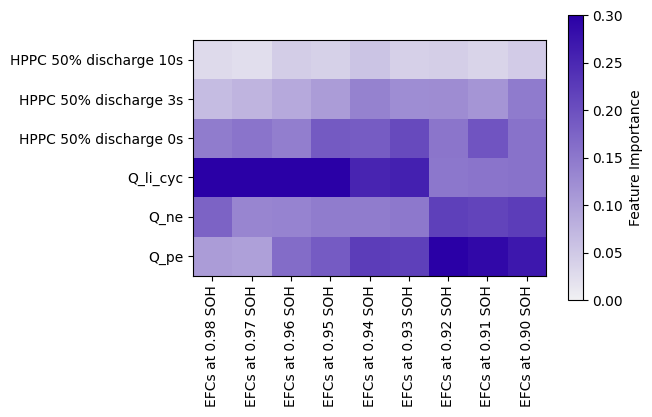

In [5]:
data_Matrix=pd.read_csv("./results_save_fig4/matrix_"+str(totsoh[0])+".csv",index_col=0).values[0,:]
for tot in totsoh[1:]:
    addnew=pd.read_csv("./results_save_fig4/matrix_"+str(tot)+".csv",index_col=0).values[0,:]
    data_Matrix=np.vstack((data_Matrix,addnew))
data_Matrix=np.rot90(data_Matrix)
redata_Matrix=data_Matrix[:-1,:] 
redata_Matrix=redata_Matrix/redata_Matrix.sum(axis=0)

cmap = sns.light_palette("#2A00A6",as_cmap=True)
fig = plt.figure(figsize=(5.7,3.7))
plt.imshow(redata_Matrix,cmap=cmap)
plt.colorbar(label="Feature Importance")

plt.clim(0, 0.3)
pxlabel=['EFCs at 0.98 SOH','EFCs at 0.97 SOH','EFCs at 0.96 SOH','EFCs at 0.95 SOH','EFCs at 0.94 SOH','EFCs at 0.93 SOH','EFCs at 0.92 SOH','EFCs at 0.91 SOH','EFCs at 0.90 SOH']
pylabel=["HPPC 50% discharge 10s","HPPC 50% discharge 3s","HPPC 50% discharge 0s","Q_li_cyc","Q_ne","Q_pe"]
plt.xticks(range(len(totsoh)),pxlabel,rotation=90)
plt.yticks(range(len(shap_df.columns[:-1])),pylabel)

### Figure 4b

In [6]:
#================create random seeds
num_seed=1
user_seed=np.random.randint(51,52,size=num_seed)
totsoh=[0.90]

SOH = 0.9
seed = 0


Text(669.2961111111113, 0.5, 'Feature value')

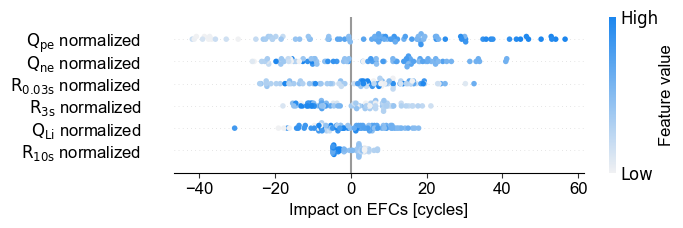

In [7]:
warnings.simplefilter('ignore')
usesoh=totsoh[0]
print('SOH =',usesoh)

eol_metrics = pd.read_pickle("../data/eol_metrics_soh%s.pkl"%usesoh)

X_train = features.loc[train_cells][features_to_train].astype('float64')
X_test = features.loc[test_cells][features_to_train].astype('float64')

cycling_features = X_train.columns.tolist()
matrix_metrics = ["EFCs (with Diagnostic)"]

for i in range(num_seed):
    exec ("shap_importances_df%s = pd.DataFrame(index=matrix_metrics,columns=cycling_features)"%i)

xgbindex=0
for xgbkk in range(num_seed):
    print('seed =',xgbkk)
    xgbpar = {
                'booster':'gbtree',
                'eta':0.12,
                'max_depth':7,
                'subsample':0.86,
                'min_child_weight':4,
                'colsample_bytree':0.87,
                'n_estimators':140,
                'reg_lambda':20,
                'reg_alpha':0.87,
    }
    # Create a dictionary to hold all the trained models
    xgb_random = {}
    target = "EFCs (with Diagnostic)"
    y_train = eol_metrics.loc[train_cells,target]
    y_test = eol_metrics.loc[test_cells,target]
    xgb = XGBRegressor(booster='gbtree',reg_alpha=10,reg_lambda=10,importance_type='gain',subsample=0.2,random_state=user_seed[xgbkk])
    xgb.fit(X_train,y_train)
    xgb_random[target] = {}
    xgb_random[target]["Model"] = xgb
    xgb_random[target]["Train RMSE"] = np.sqrt(((xgb.predict(X_train) - y_train)**2).mean())
    xgb_random[target]["Test RMSE"] = np.sqrt(((xgb.predict(X_test) - y_test)**2).mean())
    xgb_random[target]["Train MAPE"] = (xgb.predict(X_train) - y_train).div(y_train).abs().mean()*100
    xgb_random[target]["Test MAPE"] = (xgb.predict(X_test) - y_test).div(y_test).abs().mean()*100
    xgb_random[target]["Feature Importances"] = pd.DataFrame(index=X_train.columns.tolist(),
                                                            data=xgb.feature_importances_,columns=["Importances"])

cmap = sns.light_palette((28/255,134/255,238/255),as_cmap=True)
explainer = shap.TreeExplainer(xgb_random[target]["Model"])
shap_values_train = explainer.shap_values(X_train)
shap_values_test = explainer.shap_values(X_test)
shap_values = np.concatenate((shap_values_train,shap_values_test))
# remove average current
shap_values = shap_values[:,1:]
X_train=X_train.drop(["Average Current"],axis=1)
X_test=X_test.drop(["Average Current"],axis=1)



shap.summary_plot(shap_values,pd.concat([X_train,X_test]),cmap=cmap,show=False, plot_size=0.15)
ax = plt.gca()
new_ylabel = ["$\mathrm{R_{10s}}$ normalized","$\mathrm{Q_{Li}}$ normalized","$\mathrm{R_{3s}}$ normalized","$\mathrm{R_{0.03s}}$ normalized","$\mathrm{Q_{ne}}$ normalized","$\mathrm{Q_{pe}}$ normalized"]
ax.set_yticklabels(new_ylabel, fontdict={'fontname': 'Arial', 'fontsize': fig_font, 'color':fontcolor})
plt.xlabel("Impact on EFCs [cycles]", fontdict={'fontname': 'Arial', 'fontsize': fig_font, 'color':fontcolor})
plt.xticks(fontsize=fig_font, color=fontcolor, fontname='Arial')

plt.gcf().axes[-1].set_aspect(25)
plt.gcf().axes[-1].set_box_aspect(25)


cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=fig_font, colors=fontcolor)  
cbar.yaxis.set_tick_params(labelsize=fig_font, colors=fontcolor)  
cbar.set_ylabel(cbar.get_ylabel(), fontdict={'fontname': 'Arial', 'fontsize': fig_font, 'color': fontcolor})  

### Figure 4c

In [8]:
protocol_features = pd.read_pickle("../data/protocol_features.pkl")
shap_metrics = pd.read_pickle("../data/shap_features_fig4.pkl")[["min_DOD"]]
features_to_train = ["Average Current","Normalized Current Variance","Maximum Discharge Current",
                     "Relative Charge Fraction","Rest Fraction at High SOC","Rest SOC",
                     "Peak Frequency 1","Peak Frequency 2"]

X_train = protocol_features.loc[train_cells][features_to_train].astype('float64')
X_test = protocol_features.loc[test_cells][features_to_train].astype('float64')

num_seed=25
user_seed=np.random.randint(1,200,size=num_seed)

In [9]:
cycling_features = X_train.columns.tolist()
for i in range(num_seed):
    exec ("shap_importances_df%s = pd.DataFrame(index=shap_metrics.columns.tolist(),columns=cycling_features)"%i)

xgbindex=0
for xgbkk in range(num_seed):
    xgbpar = {
                'booster':'gbtree',
                'eta':0.12,
                'max_depth':7,
                'subsample':0.86,
                'min_child_weight':4,
                'colsample_bytree':0.87,
                'n_estimators':140,
                'reg_lambda':20,
                'reg_alpha':0.87,
    }
    # Create a dictionary to hold all the trained models
    xgb_random = {}
    target = "min_DOD"
    y_train = shap_metrics.loc[train_cells,target]
    y_test = shap_metrics.loc[test_cells,target]
    xgb = XGBRegressor(booster='gbtree',importance_type='gain',subsample=0.2,reg_alpha=0,random_state=user_seed[xgbkk])
    xgb.fit(X_train,y_train)
    xgb_random[target] = {}
    xgb_random[target]["Model"] = xgb
    xgb_random[target]["Train RMSE"] = np.sqrt(((xgb.predict(X_train) - y_train)**2).mean())
    xgb_random[target]["Test RMSE"] = np.sqrt(((xgb.predict(X_test) - y_test)**2).mean())
    xgb_random[target]["Train MAPE"] = (xgb.predict(X_train) - y_train).div(y_train).abs().mean()*100
    xgb_random[target]["Test MAPE"] = (xgb.predict(X_test) - y_test).div(y_test).abs().mean()*100
    xgb_random[target]["Feature Importances"] = pd.DataFrame(index=X_train.columns.tolist(),
                                                            data=xgb.feature_importances_,columns=["Importances"])

    cmap = sns.light_palette("#2A00A6",as_cmap=True)
    explainer = shap.TreeExplainer(xgb_random[target]["Model"])
    shap_values_train = explainer.shap_values(X_train)
    shap_values_test = explainer.shap_values(X_test)
    shap_values = np.concatenate((shap_values_train,shap_values_test))
    eval('shap_importances_df%s'%xgbindex).loc[target,cycling_features] = np.abs(shap_values).mean(0)
    
    xgbindex=xgbindex+1

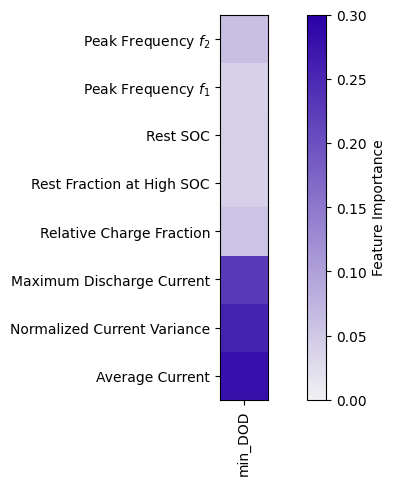

In [10]:
shap_df_all=shap_importances_df0.div(shap_importances_df0.sum(axis=1),axis=0).astype('float64')
for kk in range (1,num_seed):
    shap_df_all=shap_df_all+eval('shap_importances_df%s'%kk).div(eval('shap_importances_df%s'%kk).sum(axis=1),axis=0).astype('float64')
shap_df=shap_df_all/num_seed
reshap_df_pt=np.rot90(shap_df)

cmap = sns.light_palette("#2A00A6",as_cmap=True)
fig = plt.figure(figsize=(10,5))
plt.imshow(reshap_df_pt,cmap=cmap)
plt.colorbar(label="Feature Importance")
pxlabel=['min_DOD']
pylabel=['Peak Frequency $f_2$','Peak Frequency $f_1$','Rest SOC','Rest Fraction at High SOC','Relative Charge Fraction','Maximum Discharge Current','Normalized Current Variance','Average Current']
plt.yticks(range(len(shap_df.columns)),pylabel)
plt.xticks(range(len(shap_df.index)),pxlabel,rotation=90)
plt.clim(0, 0.3)

### Figure 4d-e

In [11]:
protocol_features = pd.read_pickle("../data/protocol_features.pkl")
shap_metrics = pd.read_pickle("../data/shap_features_fig4.pkl")[["min_DOD"]]
capacities_df = pd.read_pickle("../data/eol_metrics_soh0.9.pkl")
capacities_df = capacities_df[['Q_ne', 'Q_pe']]
data = pd.concat([protocol_features,shap_metrics,capacities_df],axis=1)
data = data.loc[train_cells+test_cells]

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

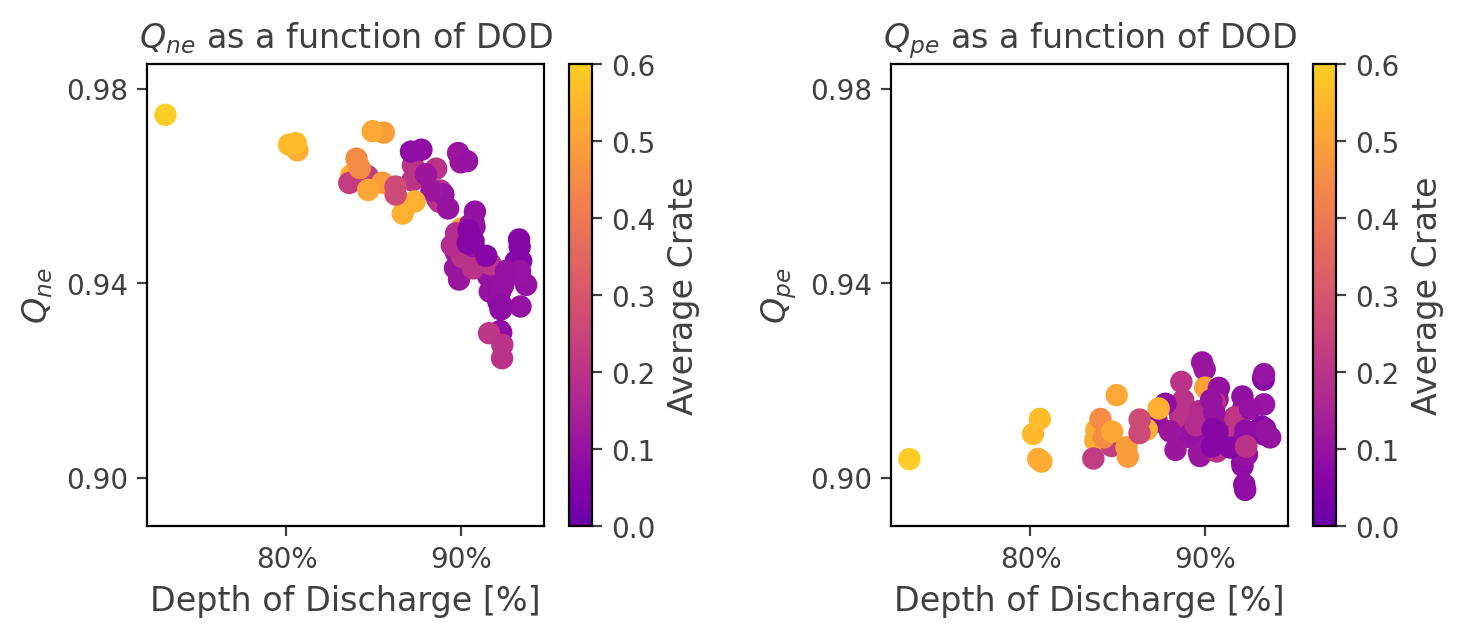

In [12]:
#### Plotting Qne and Qpe for SI figure only
metrics = ['Q_ne', 'Q_pe']
metrics_names = ['$Q_{ne}$','$Q_{pe}$']

fontcolor = (64/255,64/255,64/255)
myfontsize = 12
mytickfontsize = 10
cmap = plt.get_cmap('plasma')
newcmap = truncate_colormap(cmap, minval = 0.2, maxval = 0.9)
mynorm = Normalize(vmin=min(data['Average Current']), vmax=max(data['Average Current']))
normalizedcolors = mynorm(data['Average Current'])

fig,axes = plt.subplots(1,2,figsize=(8,3),dpi =200)
for i,metric in enumerate(metrics):
    plt.subplots_adjust(wspace=0.5)
    sc = axes[i].scatter(1-data['min_DOD'],data[metric],c=data['Average Current'] ,s= 50,cmap = newcmap,vmin=0, vmax=0.6)
    axes[i].set_xlabel("Depth of Discharge [%]",fontsize = myfontsize,color=fontcolor)
    axes[i].set_ylabel(metrics_names[i],fontsize = myfontsize,color=fontcolor)
    
    axes[i].xaxis.set_major_formatter(PercentFormatter(1,decimals=0))
    axes[i].tick_params(axis = 'both',labelsize = mytickfontsize,color=fontcolor)
    for tick in axes[i].xaxis.get_major_ticks():
        tick.label1.set_color(fontcolor)
    
    axes[i].set_title(metrics_names[i] + " as a function of DOD",fontsize = myfontsize,color=fontcolor)
    axes[i].yaxis.set_major_locator(ticker.FixedLocator([0.90,0.94,0.98]))
    axes[i].set_ylim([0.89,0.985])
    axes[1].yaxis.set_major_locator(ticker.FixedLocator([0.90,0.94,0.98]))
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label1.set_color(fontcolor)
    cbar = fig.colorbar(sc)
    cbar.ax.tick_params(labelsize=mytickfontsize,color=fontcolor)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),color=fontcolor)
    cbar.ax.set_ylabel('Average Crate', fontsize = myfontsize,color=fontcolor)
